<a href="https://colab.research.google.com/github/rodrigoamorimml/IGTIBootcamp/blob/master/SerieTemporal_PrevisaoAtmosferica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
upload = files.upload()

Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31 (1).csv


In [3]:
df_poluicao_beijing = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11,1021.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,NaN,-21,-12,1020.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,NaN,-21,-11,1019.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,NaN,-21,-14,1019.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,NaN,-20,-12,1018.0,NW,12.97,0.0,0.0


In [4]:
df_poluicao_beijing.shape

(11307, 13)

In [5]:
df_poluicao_beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11307 entries, 0 to 11306
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      11307 non-null  int64  
 1   year    11307 non-null  int64  
 2   month   11307 non-null  int64  
 3   day     11307 non-null  int64  
 4   hour    11307 non-null  int64  
 5   pm2.5   10327 non-null  float64
 6   DEWP    11307 non-null  int64  
 7   TEMP    11307 non-null  int64  
 8   PRES    11307 non-null  float64
 9   cbwd    11307 non-null  object 
 10  Iws     11307 non-null  float64
 11  Is      11306 non-null  float64
 12  Ir      11306 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 1.1+ MB


In [6]:
df_poluicao_beijing.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
pm2.5    980
DEWP       0
TEMP       0
PRES       0
cbwd       0
Iws        0
Is         1
Ir         1
dtype: int64

In [7]:
# obtendo os dados em formato de datetime
df_poluicao_beijing['datetime'] = df_poluicao_beijing[['year', 'month', 'day', 'hour']].apply(lambda row : datetime.datetime(year = row['year'], month = row['month'], day = row['day'], hour = row['hour']), axis = 1)

In [9]:
# mostrando a modificação
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11,1021.0,NW,1.79,0.0,0.0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12,1020.0,NW,4.92,0.0,0.0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11,1019.0,NW,6.71,0.0,0.0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14,1019.0,NW,9.84,0.0,0.0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12,1018.0,NW,12.97,0.0,0.0,2010-01-01 04:00:00


In [14]:
# encontrando as datas máximas e minimas no dataset
print(f'Data inicial de coleta: {df_poluicao_beijing.datetime.min()}')
print(f'Data Final de coleta: {df_poluicao_beijing.datetime.max()}')

Data inicial de coleta: 2010-01-01 00:00:00
Data Final de coleta: 2011-04-17 02:00:00


In [15]:
df_pressao_atmosferica = df_poluicao_beijing[['datetime', 'PRES']]
df_pressao_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


In [16]:
df_pressao_atmosferica.sort_values('datetime', ascending = True, inplace = True) # ordena os valores pela data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_pressao_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


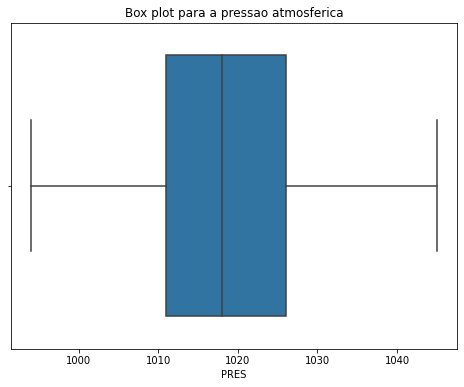

In [21]:
# verificano possiveis outliers com o boxplot

plt.figure(figsize = (8, 6))
plot = sns.boxplot(df_pressao_atmosferica['PRES'])
plot.set_title('Box plot para a pressao atmosferica')
plt.show()

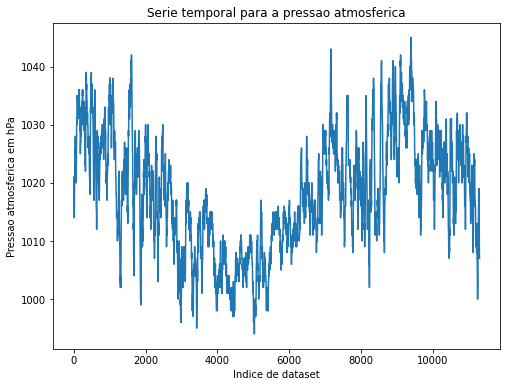

In [23]:
# plotando os valores de pressao atmosferica

plt.figure(figsize = (8, 6))
plot = sns.lineplot(x = df_pressao_atmosferica.index , y = df_pressao_atmosferica.PRES)
plot.set_title('Serie temporal para a pressao atmosferica')
plot.set_xlabel('Indice de dataset')
plot.set_ylabel('Pressao atmosferica em hPa')
plt.show()

Preparando os dados para serem utilizados no modelo de previsao via MLP

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) # define o intervalor entre 0 e 1 para os dados serem normalizados
df_pressao_atmosferica['PRES_normalizado'] = scaler.fit_transform(np.array(df_pressao_atmosferica.PRES).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df_pressao_atmosferica.head()

,datetime,PRES,PRES_normalizado
0,2010-01-01 00:00:00,1021.0,0.529412
1,2010-01-01 01:00:00,1020.0,0.509804
2,2010-01-01 02:00:00,1019.0,0.490196
3,2010-01-01 03:00:00,1019.0,0.490196
4,2010-01-01 04:00:00,1018.0,0.470588


In [27]:
df_poluicao_beijing.year.value_counts()

2010    8760
2011    2547
Name: year, dtype: int64

In [29]:
# dividindo os dados entre treinamento e test

data_de_corte = datetime.datetime(year = 2011, month = 1, day = 1, hour = 0) # defina a data de corte para 01/01/2011
df_treinamento = df_pressao_atmosferica.loc[df_pressao_atmosferica['datetime'] < data_de_corte]
df_test = df_pressao_atmosferica.loc[df_pressao_atmosferica['datetime'] >= data_de_corte]
print(df_treinamento.shape)
print(df_test.shape)

(8760, 3)
(2547, 3)


,datetime,PRES,PRES_normalizado
0,2010-01-01 00:00:00,1021.0,0.529412
1,2010-01-01 01:00:00,1020.0,0.509804
2,2010-01-01 02:00:00,1019.0,0.490196
3,2010-01-01 03:00:00,1019.0,0.490196
4,2010-01-01 04:00:00,1018.0,0.470588
...,...,...,...
8755,2010-12-31 19:00:00,1030.0,0.705882
8756,2010-12-31 20:00:00,1031.0,0.725490
8757,2010-12-31 21:00:00,1031.0,0.725490
8758,2010-12-31 22:00:00,1032.0,0.745098


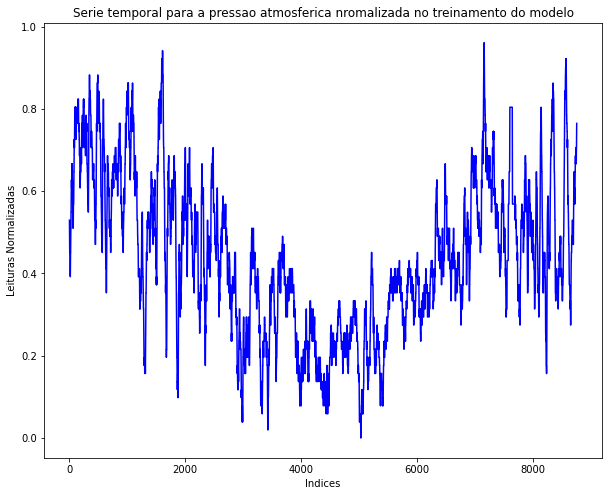

In [31]:
# verificando o plot dos dados normalizados

plt.figure(figsize = (10, 8))
plot = sns.lineplot(x = df_treinamento.index , y = df_treinamento.PRES_normalizado, color = 'b')
plot.set_title('Serie temporal para a pressao atmosferica nromalizada no treinamento do modelo')
plot.set_xlabel('Indices')
plot.set_ylabel('Leituras Normalizadas')
plt.show()

In [33]:
# definidno o numero de valores a serem utilizados para a previsao

def formata_entrada_saida(serie_temporal_original, numero_de_passos):

  x, y = [], []
  for i in range(numero_de_passos, serie_temporal_original.shape[0]):
    x.append(list(serie_temporal_original.loc[i - numero_de_passos: i-1]))
    y.append(serie_temporal_original.loc[i])
  x, y = np.array(x), np.array(y)
  return x, y

In [35]:
# formata os dados para o treinamento do modelo
x_train, y_train = formata_entrada_saida(df_treinamento['PRES_normalizado'], 10)
print(x_train.shape)
print(y_train.shape)

(8750, 10)
(8750,)


In [37]:
x_test, y_test = formata_entrada_saida(df_test['PRES_normalizado'].reset_index(drop = True), 10)
print(x_test.shape)
print(y_test.shape)

(2537, 10)
(2537,)


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD 


In [40]:
i = Input(shape = (10, ), dtype = 'float32')

x = Dense(32, activation = 'linear')(i)
x = Dense(16, activation = 'linear')(x)
x = Dense(16, activation = 'linear')(x)

x = Dropout(0.2)(x)
x = Dense(1, activation = 'linear')(x)

model = Model(i, x)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
____________________________________________________

In [42]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [43]:
model.fit(x_train, y_train, batch_size = 16, epochs = 20, shuffle = True, verbose = 1)

Epoch 1/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 2/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0029
Epoch 3/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 4/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 5/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 6/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 7/20
547/547 [==============================] - 1s 1ms/step - loss: 9.0081e-04
Epoch 8/20
547/547 [==============================] - 1s 1ms/step - loss: 9.1993e-04
Epoch 9/20
547/547 [==============================] - 1s 1ms/step - loss: 8.8331e-04
Epoch 10/20
547/547 [==============================] - 1s 996us/step - loss: 8.3535e-04
Epoch 11/20
547/547 [==============================] - 1s 1ms/step - loss: 8.5268e-04
Epoch 12/20
547/547 [==============================] - 1s 995us/step - loss: 8.5698e-

In [44]:
# realiza a previsao com o modelo MLP

previsao = model.predict(x_test)
previsao_PRES = scaler.inverse_transform(previsao)
previsao_PRES.shape

(2537, 1)

In [47]:
previsao_PRES = np.squeeze(previsao_PRES) # remove entradas de uma dimensao
previsao_PRES.shape

(2537,)

In [49]:
from sklearn.metrics import r2_score

r2 = r2_score(df_test['PRES'].iloc[10:], previsao_PRES)
print(round(r2, 4)) # coeficiente de determinação 

0.9906


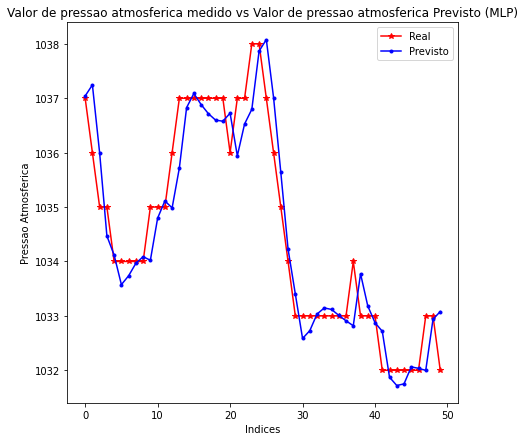

In [51]:
# Plotando so valores reais

plt.figure(figsize = (7, 7))
plt.plot(range(50), df_test['PRES'].iloc[10:60], linestyle = '-', marker = '*', color = 'r')
plt.plot(range(50), previsao_PRES[:50], linestyle = '-', marker = '.', color = 'b')
plt.legend(['Real', 'Previsto'], loc = 'best')
plt.title('Valor de pressao atmosferica medido vs Valor de pressao atmosferica Previsto (MLP)')
plt.ylabel('Pressao Atmosferica')
plt.xlabel('Indices')
plt.show()

In [54]:
# Using CNN
from tensorflow.keras.layers import Conv1D, AveragePooling1D, Flatten, ZeroPadding1D

i = Input(shape = (10, 1), dtype = 'float32')
x = ZeroPadding1D(padding = 1)(i)
x = Conv1D(64, 3, strides = 1, use_bias = True)(x)
x = AveragePooling1D(pool_size = 3, strides = 1)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1, activation = 'linear')(x)

model = Model(i, x)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 12, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 64)            256       
_________________________________________________________________
average_pooling1d (AveragePo (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [55]:
# Transformando os dados de treinamento para 3D
x_train, x_test = x_train.reshape((x_train.shape[0], x_train.shape[1], 1)) , x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
print(x_test.shape)

(8750, 10, 1)
(2537, 10, 1)


In [57]:
model.compile(loss ='mean_squared_error', optimizer = 'adam')

model.fit(x_train, y_train, batch_size = 16, epochs = 20, verbose = 1, shuffle =True)

Epoch 1/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 2/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 3/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 4/20
547/547 [==============================] - 1s 2ms/step - loss: 8.4254e-04
Epoch 5/20
547/547 [==============================] - 1s 2ms/step - loss: 7.3310e-04
Epoch 6/20
547/547 [==============================] - 1s 2ms/step - loss: 6.1973e-04
Epoch 7/20
547/547 [==============================] - 1s 2ms/step - loss: 5.4457e-04
Epoch 8/20
547/547 [==============================] - 1s 2ms/step - loss: 4.9813e-04
Epoch 9/20
547/547 [==============================] - 1s 2ms/step - loss: 4.4708e-04
Epoch 10/20
547/547 [==============================] - 1s 2ms/step - loss: 4.4245e-04
Epoch 11/20
547/547 [==============================] - 1s 2ms/step - loss: 4.4603e-04
Epoch 12/20
547/547 [==============================] - 1s 1ms/step - loss: 

In [58]:
# Previsao CNN
previsao_cnn = model.predict(x_test)
pres_cnn = np.squeeze(scaler.inverse_transform(previsao_cnn))


In [59]:
r2_cnn = r2_score(df_test['PRES'].iloc[10:], pres_cnn)
print(f'Coeficiente de determinação: {round(r2, 4)}')

Coeficiente de determinação: 0.9906


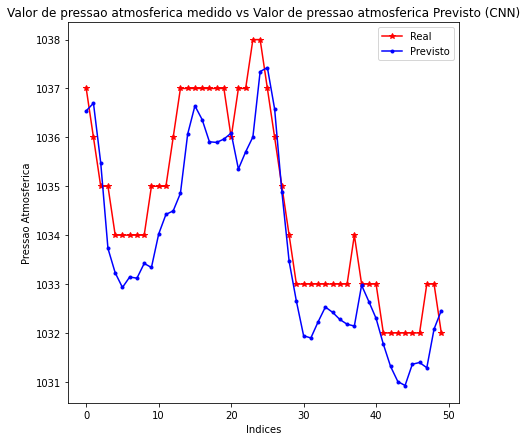

In [61]:
# plotando os valores reais x previstos

plt.figure(figsize = (7, 7))
plt.plot(range(50), df_test['PRES'].iloc[10:60], linestyle = '-', marker = '*', color = 'r')
plt.plot(range(50), pres_cnn[:50], linestyle = '-', marker = '.', color = 'b')
plt.legend(['Real', 'Previsto'], loc = 'best')
plt.title('Valor de pressao atmosferica medido vs Valor de pressao atmosferica Previsto (CNN)')
plt.ylabel('Pressao Atmosferica')
plt.xlabel('Indices')
plt.show()